In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#import data
df = pd.read_csv('dfFeatureEngineering.csv',index_col =0)

In [3]:
#list of questions and ideas

#does training the data on the log of sales price make a difference for KNN?

In [4]:
#filters for looking at data

objectFilter = ['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'DataType',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Functional', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType']

intFilter = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold']

OrgFeatures = [objectFilter + intFilter]

FeatEnginer = list(df.columns[-9:])

In [5]:
dfTrain = df[df['DataType']== 1].copy() #.copy makes it explict that we want a copy, not a view of the orignal frame
dfTest = df[df['DataType']== 0].copy()

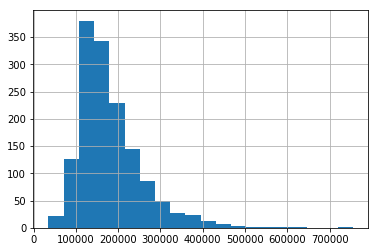

In [6]:
dfTrain.SalePrice.hist(bins = 20)

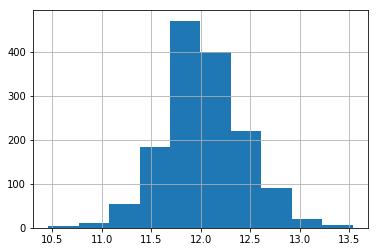

In [7]:
#Makes the price more uniform, but is that something we actually want?  
SalePriceLog = np.log(dfTrain.SalePrice)
SalePriceLog.hist()

In [8]:
print(dfTrain.shape)
print(dfTest.shape)

(1460, 78)
(1459, 78)


In [9]:
dfTrain['SalePriceLog'] = np.log(dfTrain.SalePrice)

In [11]:
dfTrain[['SalePrice','SalePriceLog']].head()

,SalePrice,SalePriceLog
0,208500.0,12.247694
1,181500.0,12.109011
2,223500.0,12.317167
3,140000.0,11.849398
4,250000.0,12.429216


In [25]:
#https://www.dataquest.io/blog/settingwithcopywarning/
df[df['DataType']== 1]['SalePriceLog']
#np.log(dfTrain.loc[:,['SalePrice']])

KeyError: 'SalePriceLog'

In [14]:
#dfTrain['SalePriceLog'] = 
x = np.log(dfTrain['SalePrice'])
dfTrain['SalePriceLog'] = x

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [15]:
dfTrain['SalePriceLog'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePriceLog, dtype: float64